<a href="https://colab.research.google.com/github/Chetna-Jha-QC/Chetna-Jha-QC/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit[visualization]==1.1.0
# Use the following if you are on MacOS/zsh
#!pip install 'qiskit[visualization]'==1.1.0
!pip install qiskit_ibm_runtime
!pip install matplotlib
!pip install pylatexenc
!pip install networkx
!pip install qiskit_aer
!pip install prototype-zne
!pip install git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git

  Cloning https://github.com/qiskit-community/Quantum-Challenge-Grader.git to /tmp/pip-req-build-q3jbtvhm
  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/Quantum-Challenge-Grader.git /tmp/pip-req-build-q3jbtvhm
  Resolved https://github.com/qiskit-community/Quantum-Challenge-Grader.git to commit bcaff898473fd54f3e2668f162817947787f7268
  Preparing metadata (setup.py) ... done


In [ ]:
%set_env QXToken=86b6b9e5a248f8ae53d07dbf584a45208b12702ed9fe50ce1072f368e52630cae7b9b45548fdaedbbf158b4587b0a89551bc42c01719da57e021e472b14c17c7

env: QXToken=86b6b9e5a248f8ae53d07dbf584a45208b12702ed9fe50ce1072f368e52630cae7b9b45548fdaedbbf158b4587b0a89551bc42c01719da57e021e472b14c17c7


In [ ]:
from qiskit.circuit import QuantumCircuit, Parameter
from qiskit.circuit.library import PauliEvolutionGate
from qiskit.quantum_info import SparsePauliOp
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler import CouplingMap
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.synthesis import LieTrotter

from qiskit_ibm_runtime.options import EstimatorOptions, DynamicalDecouplingOptions
from qiskit_ibm_runtime import EstimatorV2, Batch

import numpy as np
import matplotlib.pyplot as plt
import json


In [ ]:
# Define system parameters

num_spins = 12
anisotropy = 1.
h = 1.
dt = Parameter('δt')

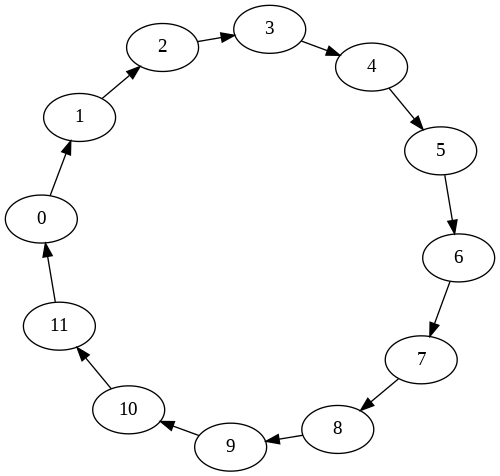

In [ ]:
lattice_map = CouplingMap.from_ring(num_spins, bidirectional=False)
lattice_map.draw()

In [ ]:
edgelist = lattice_map.graph.edge_list()
hamlist = []

for edge in edgelist:
    hamlist.append(("XX", edge, 1.))
    hamlist.append(("YY", edge, 1.))
    hamlist.append(("ZZ", edge, anisotropy))

for qubit in lattice_map.physical_qubits:
    hamlist.append(("X", [qubit], h))

hamiltonian = SparsePauliOp.from_sparse_list(hamlist, num_qubits=num_spins)

In [ ]:
print(hamiltonian)

SparsePauliOp(['IIIIIIIIIIXX', 'IIIIIIIIIIYY', 'IIIIIIIIIIZZ', 'IIIIIIIIIXXI', 'IIIIIIIIIYYI', 'IIIIIIIIIZZI', 'IIIIIIIIXXII', 'IIIIIIIIYYII', 'IIIIIIIIZZII', 'IIIIIIIXXIII', 'IIIIIIIYYIII', 'IIIIIIIZZIII', 'IIIIIIXXIIII', 'IIIIIIYYIIII', 'IIIIIIZZIIII', 'IIIIIXXIIIII', 'IIIIIYYIIIII', 'IIIIIZZIIIII', 'IIIIXXIIIIII', 'IIIIYYIIIIII', 'IIIIZZIIIIII', 'IIIXXIIIIIII', 'IIIYYIIIIIII', 'IIIZZIIIIIII', 'IIXXIIIIIIII', 'IIYYIIIIIIII', 'IIZZIIIIIIII', 'IXXIIIIIIIII', 'IYYIIIIIIIII', 'IZZIIIIIIIII', 'XXIIIIIIIIII', 'YYIIIIIIIIII', 'ZZIIIIIIIIII', 'XIIIIIIIIIIX', 'YIIIIIIIIIIY', 'ZIIIIIIIIIIZ', 'IIIIIIIIIIIX', 'IIIIIIIIIIXI', 'IIIIIIIIIXII', 'IIIIIIIIXIII', 'IIIIIIIXIIII', 'IIIIIIXIIIII', 'IIIIIXIIIIII', 'IIIIXIIIIIII', 'IIIXIIIIIIII', 'IIXIIIIIIIII', 'IXIIIIIIIIII', 'XIIIIIIIIIII'],
              coeffs=[1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 

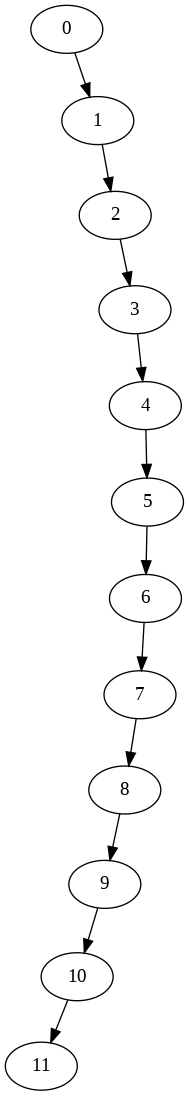

In [ ]:
lattice_map1 = CouplingMap.from_line(num_spins, bidirectional=False)
lattice_map1.draw()

In [ ]:
# Exercise 1: Create a function that will correctly generate the Hamiltonian for a Heisenberg chain given either


def build_hamiltonian(num_spins, anisotropy, h):

    ### Your code goes here ###
    hamList =[]
    edgelist = lattice_map1.graph.edge_list()

    for edge in edgelist:
        hamList.append(("XX", edge, 1.))
        hamList.append(("YY", edge, 1.))
        hamList.append(("ZZ", edge, anisotropy))
    #print(hamList)
    for qubit in lattice_map1.physical_qubits:
        hamList.append(("X", [qubit], h))

    hamiltonian = SparsePauliOp.from_sparse_list(hamList, num_qubits=num_spins)
    return hamiltonian


In [ ]:
print(build_hamiltonian(num_spins, anisotropy, h))

SparsePauliOp(['IIIIIIIIIIXX', 'IIIIIIIIIIYY', 'IIIIIIIIIIZZ', 'IIIIIIIIIXXI', 'IIIIIIIIIYYI', 'IIIIIIIIIZZI', 'IIIIIIIIXXII', 'IIIIIIIIYYII', 'IIIIIIIIZZII', 'IIIIIIIXXIII', 'IIIIIIIYYIII', 'IIIIIIIZZIII', 'IIIIIIXXIIII', 'IIIIIIYYIIII', 'IIIIIIZZIIII', 'IIIIIXXIIIII', 'IIIIIYYIIIII', 'IIIIIZZIIIII', 'IIIIXXIIIIII', 'IIIIYYIIIIII', 'IIIIZZIIIIII', 'IIIXXIIIIIII', 'IIIYYIIIIIII', 'IIIZZIIIIIII', 'IIXXIIIIIIII', 'IIYYIIIIIIII', 'IIZZIIIIIIII', 'IXXIIIIIIIII', 'IYYIIIIIIIII', 'IZZIIIIIIIII', 'XXIIIIIIIIII', 'YYIIIIIIIIII', 'ZZIIIIIIIIII', 'IIIIIIIIIIIX', 'IIIIIIIIIIXI', 'IIIIIIIIIXII', 'IIIIIIIIXIII', 'IIIIIIIXIIII', 'IIIIIIXIIIII', 'IIIIIXIIIIII', 'IIIIXIIIIIII', 'IIIXIIIIIIII', 'IIXIIIIIIIII', 'IXIIIIIIIIII', 'XIIIIIIIIIII'],
              coeffs=[1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j,

In [ ]:
# Submit answer to exercise 1
from qc_grader.challenges.qgss_2024 import grade_lab4_ex1

grade_lab4_ex1(build_hamiltonian)


Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


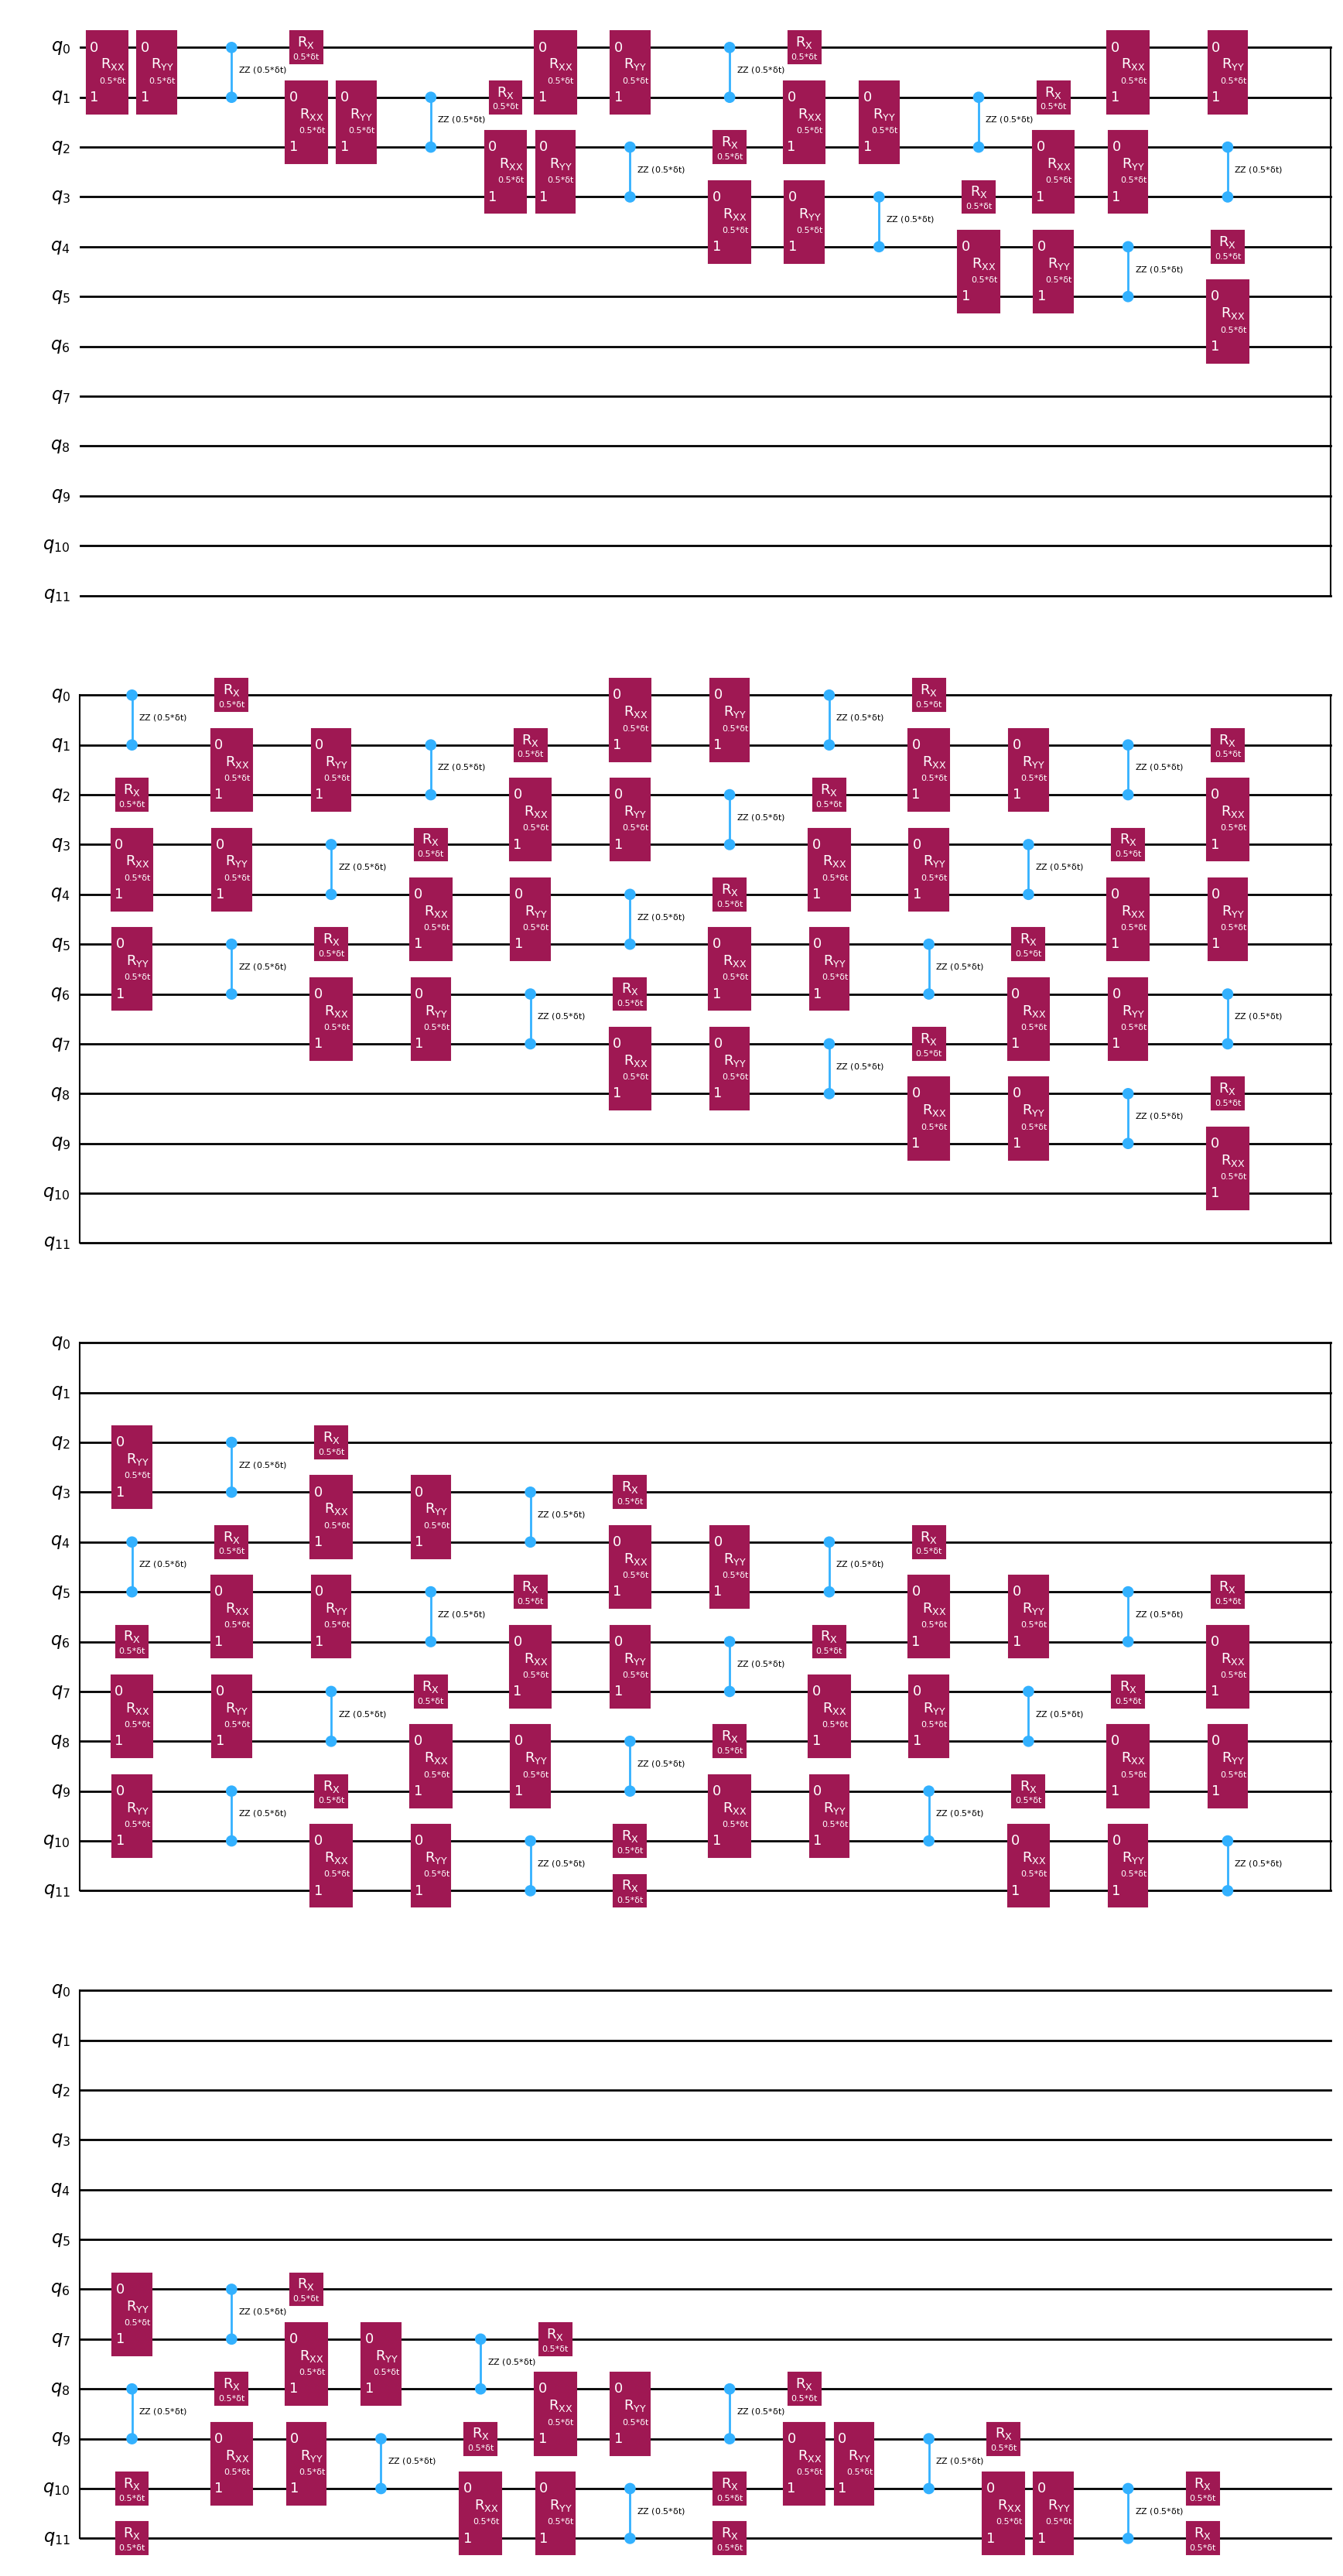

In [ ]:
# Prepare a time evolution circuit
hamiltonian = build_hamiltonian(num_spins, anisotropy, h)
time_evolution_operator = PauliEvolutionGate(hamiltonian, time=dt)
trotter_factory = LieTrotter(reps=4)
evolution_circuit = trotter_factory.synthesize(time_evolution_operator)
evolution_circuit.decompose().draw('mpl')

In [ ]:
z_observables = [ SparsePauliOp.from_sparse_list([('Z', [i], 1.)], num_qubits=num_spins) for i in range(num_spins) ]
print(z_observables)

[SparsePauliOp(['IIIIIIIIIIIZ'],
              coeffs=[1.+0.j]), SparsePauliOp(['IIIIIIIIIIZI'],
              coeffs=[1.+0.j]), SparsePauliOp(['IIIIIIIIIZII'],
              coeffs=[1.+0.j]), SparsePauliOp(['IIIIIIIIZIII'],
              coeffs=[1.+0.j]), SparsePauliOp(['IIIIIIIZIIII'],
              coeffs=[1.+0.j]), SparsePauliOp(['IIIIIIZIIIII'],
              coeffs=[1.+0.j]), SparsePauliOp(['IIIIIZIIIIII'],
              coeffs=[1.+0.j]), SparsePauliOp(['IIIIZIIIIIII'],
              coeffs=[1.+0.j]), SparsePauliOp(['IIIZIIIIIIII'],
              coeffs=[1.+0.j]), SparsePauliOp(['IIZIIIIIIIII'],
              coeffs=[1.+0.j]), SparsePauliOp(['IZIIIIIIIIII'],
              coeffs=[1.+0.j]), SparsePauliOp(['ZIIIIIIIIIII'],
              coeffs=[1.+0.j])]


In [ ]:
# Exercise 2: Create a function that will generate a reordered Hamiltonian which is more efficient for qpu execution.

def build_layered_hamiltonian(num_spins, anisotropy, h):

    ### Your code goes here ###
    ham_list_even =[]
    ham_list_odd =[]
    edgelist = lattice_map1.graph.edge_list()

    for edge in edgelist:
        if(edge[0] % 2 == 0):
          ham_list_even.append(("XX", edge, 1.))
          ham_list_even.append(("YY", edge, 1.))
          ham_list_even.append(("ZZ", edge, anisotropy))
        else:
          ham_list_odd.append(("XX", edge, 1.))
          ham_list_odd.append(("YY", edge, 1.))
          ham_list_odd.append(("ZZ", edge, anisotropy))
    ham_list =[]
    for qubit in lattice_map1.physical_qubits:
        ham_list.append(("X", [qubit], h))

    print(ham_list_even)
    print(ham_list_odd)
    hamiltonian_even = SparsePauliOp.from_sparse_list(ham_list_even + ham_list, num_qubits=num_spins)
    hamiltonian_odd = SparsePauliOp.from_sparse_list(ham_list_odd, num_qubits=num_spins)
    hamiltonian = hamiltonian_even + hamiltonian_odd
    return hamiltonian

H = build_layered_hamiltonian(num_spins=num_spins, anisotropy= 2 * anisotropy, h = h)
print(H)

[('XX', (0, 1), 1.0), ('YY', (0, 1), 1.0), ('ZZ', (0, 1), 2.0), ('XX', (2, 3), 1.0), ('YY', (2, 3), 1.0), ('ZZ', (2, 3), 2.0), ('XX', (4, 5), 1.0), ('YY', (4, 5), 1.0), ('ZZ', (4, 5), 2.0), ('XX', (6, 7), 1.0), ('YY', (6, 7), 1.0), ('ZZ', (6, 7), 2.0), ('XX', (8, 9), 1.0), ('YY', (8, 9), 1.0), ('ZZ', (8, 9), 2.0), ('XX', (10, 11), 1.0), ('YY', (10, 11), 1.0), ('ZZ', (10, 11), 2.0)]
[('XX', (1, 2), 1.0), ('YY', (1, 2), 1.0), ('ZZ', (1, 2), 2.0), ('XX', (3, 4), 1.0), ('YY', (3, 4), 1.0), ('ZZ', (3, 4), 2.0), ('XX', (5, 6), 1.0), ('YY', (5, 6), 1.0), ('ZZ', (5, 6), 2.0), ('XX', (7, 8), 1.0), ('YY', (7, 8), 1.0), ('ZZ', (7, 8), 2.0), ('XX', (9, 10), 1.0), ('YY', (9, 10), 1.0), ('ZZ', (9, 10), 2.0)]
SparsePauliOp(['IIIIIIIIIIXX', 'IIIIIIIIIIYY', 'IIIIIIIIIIZZ', 'IIIIIIIIXXII', 'IIIIIIIIYYII', 'IIIIIIIIZZII', 'IIIIIIXXIIII', 'IIIIIIYYIIII', 'IIIIIIZZIIII', 'IIIIXXIIIIII', 'IIIIYYIIIIII', 'IIIIZZIIIIII', 'IIXXIIIIIIII', 'IIYYIIIIIIII', 'IIZZIIIIIIII', 'XXIIIIIIIIII', 'YYIIIIIIIIII', 'ZZIIIIII

In [ ]:
# Submit answer to exercise 2
from qc_grader.challenges.qgss_2024 import grade_lab4_ex2

grade_lab4_ex2(build_layered_hamiltonian)


[('XX', (0, 1), 1.0), ('YY', (0, 1), 1.0), ('ZZ', (0, 1), 1.0), ('XX', (2, 3), 1.0), ('YY', (2, 3), 1.0), ('ZZ', (2, 3), 1.0), ('XX', (4, 5), 1.0), ('YY', (4, 5), 1.0), ('ZZ', (4, 5), 1.0), ('XX', (6, 7), 1.0), ('YY', (6, 7), 1.0), ('ZZ', (6, 7), 1.0), ('XX', (8, 9), 1.0), ('YY', (8, 9), 1.0), ('ZZ', (8, 9), 1.0), ('XX', (10, 11), 1.0), ('YY', (10, 11), 1.0), ('ZZ', (10, 11), 1.0)]
[('XX', (1, 2), 1.0), ('YY', (1, 2), 1.0), ('ZZ', (1, 2), 1.0), ('XX', (3, 4), 1.0), ('YY', (3, 4), 1.0), ('ZZ', (3, 4), 1.0), ('XX', (5, 6), 1.0), ('YY', (5, 6), 1.0), ('ZZ', (5, 6), 1.0), ('XX', (7, 8), 1.0), ('YY', (7, 8), 1.0), ('ZZ', (7, 8), 1.0), ('XX', (9, 10), 1.0), ('YY', (9, 10), 1.0), ('ZZ', (9, 10), 1.0)]
Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


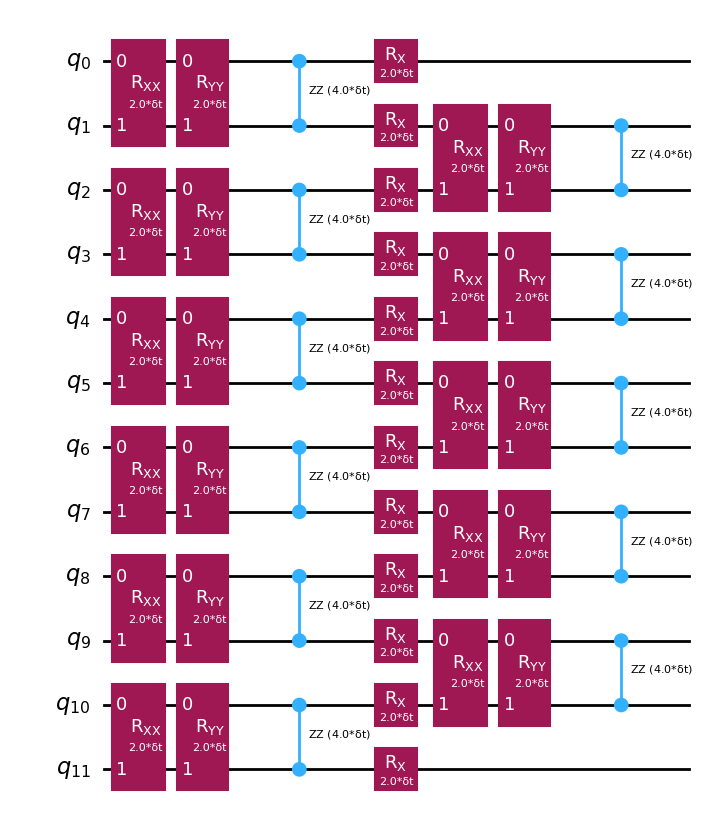

In [ ]:
time_evolution_operator_H = PauliEvolutionGate(H, time=dt)
trotter_factory_H = LieTrotter()
evolution_circuit_H = trotter_factory_H.synthesize(time_evolution_operator_H)
evolution_circuit_H.decompose().draw('mpl')

In [ ]:
# Your code goes here
from qiskit_ibm_runtime import QiskitRuntimeService
import os

#QiskitRuntimeService.save_account(channel = 'ibm_quantum', token = os.environ['QXToken'], set_as_default= True)
service = QiskitRuntimeService()

backend = service.backend('ibm_brisbane')

AccountNotFoundError: 'Unable to find account.'

In [ ]:
pip install qiskit-ibm-runtime


In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
import os

# Replace 'YOUR_IBM_QUANTUM_TOKEN' with your actual IBM Quantum token
QiskitRuntimeService.save_account(channel='ibm_quantum', token='86b6b9e5a248f8ae53d07dbf584a45208b12702ed9fe50ce1072f368e52630cae7b9b45548fdaedbbf158b4587b0a89551bc42c01719da57e021e472b14c17c7', set_as_default=True)


In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService()
backend = service.backend('ibm_brisbane')

print("Backend:", backend)


Backend: <IBMBackend('ibm_brisbane')>


In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
import os

# Save your IBM Quantum account token
# Replace 'YOUR_IBM_QUANTUM_TOKEN' with your actual IBM Quantum token
QiskitRuntimeService.save_account(channel='ibm_quantum', token='86b6b9e5a248f8ae53d07dbf584a45208b12702ed9fe50ce1072f368e52630cae7b9b45548fdaedbbf158b4587b0a89551bc42c01719da57e021e472b14c17c7', overwrite=True)

# Load the service
service = QiskitRuntimeService()

# Select the backend
backend = service.backend('ibm_brisbane')

print("Backend:", backend)


Backend: <IBMBackend('ibm_brisbane')>


In [ ]:
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes.optimization import *
from qiskit.transpiler.passes.synthesis.unitary_synthesis import UnitarySynthesis

pass_manager = generate_preset_pass_manager(backend=backend, optimization_level=3)
# Run the pass manager on `evolution_circuit` and name the variable `isa_circuit`
isa_circuit = pass_manager.run(evolution_circuit_H)

In [ ]:
isa_circuit.draw(fold = -1, idle_wires = False)

global phase: 3π/2
                                                                                         ┌──────┐    ┌────────┐  ┌────┐ ┌──────────┐ ┌────────────┐┌──────────┐   ┌────┐   ┌─────────────┐                 ┌──────┐┌────────────┐    ┌────┐    ┌─────────┐┌────────────┐              ┌──────┐  ┌─────────┐    ┌────┐   ┌──────────┐              ┌──────┐     ┌────────┐      ┌────┐    ┌─────────┐ ┌────────────┐┌─────────┐ ┌────┐ ┌─────────────┐               ┌──────┐      ┌───┐        ┌─────────────┐  ┌────────────────┐   ┌────┐      ┌──────────┐                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
q_11 -> 34 ──────────────────────────────────────────────────────────────────────────────┤0     ├────┤ Rz(-π) ├──┤ √X ├─┤ Rz(-π/2) ├─┤ Rz(2.0*δt) ├┤ Rz(-π/2) ├───┤ √X ├───┤ Rz(0.26273) ├─────────────────┤0     ├┤ Rz(1.8335) ├────┤ √X ├────┤ Rz(π/2) ├┤ Rz(2.0*δt) ├──────────────┤0     ├──┤ Rz(π/2) ├────┤ √X ├───┤ Rz(-π/2) ├──────────────┤0     ├─────┤ Rz(-π) ├──────┤ √X ├────┤ Rz(π/2) ├─┤ Rz(4.0*δt) ├┤ Rz(π/2) ├─┤ √X ├─┤ Rz(0.82644) ├───────────────┤0     ├──────┤ X ├────────┤ Rz(0.74436) ├──┤ Rz(2.0*δt + π) ├───┤ √X ├──────┤ Rz(5π/2) ├────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
           ┌─────────┐   ┌────┐  ┌─────────────┐    ┌────┐     ┌─────────┐    ┌──────┐   │      │   ┌┴────────┤  ├────┤┌┴──────────┴┐└────────────┘└──────────┘   └────┘   └─────────────┘     ┌──────┐    │      │└───┬────┬───┘ ┌──┴────┴──┐ └─────────┘└────────────┘  ┌──────┐    │      │  ├─────────┴┐   ├────┤   ├─────────┬┘  ┌──────┐    │      │  ┌──┴────────┴─┐    ├────┤    ├─────────┴┐└────────────┘└─────────┘ └────┘ └─────────────┘    ┌──────┐   │      │   ┌──┴───┴───┐    └────┬────┬───┘  └┬──────────────┬┘   ├────┤   ┌──┴──────────┴──┐   ┌────┐                 ┌──────┐  ┌──────────┐    ┌────┐     ┌──────────┐ ┌────────────┐  ┌──────────┐      ┌────┐    ┌─────────────┐                ┌──────┐  ┌────────────┐    ┌────┐    ┌─────────┐ ┌────────────┐                   ┌──────┐  ┌─────────┐      ┌────┐    ┌──────────┐                  ┌──────┐      ┌────────┐      ┌────┐      ┌─────────┐  ┌────────────┐  ┌──────────┐   ┌────┐  ┌─────────────┐               ┌──────┐ ┌────────────┐  ┌────┐   ┌─────────┐       
 q_8 -> 41 ┤ Rz(π/2) ├───┤ √X ├──┤ Rz(-2.3207) ├────┤ √X ├─────┤ Rz(π/2) ├────┤1     ├───┤      ├───┤ Rz(π/2) ├──┤ √X ├┤ Rz(2.3207) ├──────────────────────────────────────────────────────────┤1     ├────┤      ├────┤ √X ├─────┤ Rz(-π/2) ├────────────────────────────┤1     ├────┤      ├──┤ Rz(-π/2) ├───┤ √X ├───┤ Rz(π/2) ├───┤1     ├────┤      ├──┤ Rz(-2.2643) ├────┤ √X ├────┤ Rz(-π/2) ├────────────────────────────────────────────────────┤1     ├───┤      ├───┤ Rz(-π/2) ├─────────┤ √X ├───────┤ Rz(-0.87728) ├────┤ √X ├───┤ Rz(2.0*δt + π) ├───┤ √X ├─────────────────┤0     ├──┤ Rz(-π/2) ├────┤ √X ├─────┤ Rz(-π/2) ├─┤ Rz(2.0*δt) ├──┤ Rz(-π/2) ├──────┤ √X ├────┤ Rz(0.26273) ├────────────────┤0     ├──┤ Rz(1.8335) ├────┤ √X ├────┤ Rz(π/2) ├─┤ Rz(2.0*δt) ├───────────────────┤0     ├──┤ Rz(π/2) ├──────┤ √X ├────┤ Rz(-π/2) ├──────────────────┤0     ├──────┤ Rz(-π) ├──────┤ √X ├──────┤ Rz(π/2) ├──┤ Rz(4.0*δt) ├─

In [ ]:
layout = isa_circuit.layout
isa_z_obs = SparsePauliOp("Z" * num_spins)
isa_z_obs = [abs_obs.apply_layout(layout=layout) for abs_obs in z_observables]

In [ ]:
# Submit answer to exercise 3
from qc_grader.challenges.qgss_2024 import grade_lab4_ex3

grade_lab4_ex3(
    backend,
    isa_circuit,
    isa_z_obs
)



Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [ ]:
dd_options = DynamicalDecouplingOptions(enable=True, sequence_type="XpXm")
options = EstimatorOptions(dynamical_decoupling=dd_options)
options.resilience.zne_mitigation = True
options

max_execution_time,Unset
default_precision,Unset
default_shots,Unset
optimization_level,Unset
resilience_level,Unset
seed_estimator,Unset
experimental,Unset
▸environment,EnvironmentOptions
log_level,'WARNING'
callback,None
job_tags,None


In [ ]:
# Exercise 4: Create the set of transpiled time evolution circuits and observables for each
#  of the phases and values of h to investigate.
# Hint: list comprehension will make this much simpler to approach

dt = Parameter('δt')
dt_val = [5*np.pi/2.]
h_vals = np.linspace(0., np.pi/2, 12)
anisotropies = {"Anisotropic":-5., "XXX":1}
num_spins = 50

# Dictionaries to use for exercise submission
hamiltonians = {}
time_evolution_operators = {}
trotter_circuits = {}
isa_circuits = {}
isa_z_observables = {}

lattice_map1 = CouplingMap.from_line(num_spins, bidirectional=False)
# Loop over each phase of the heisenberg system
for phase, anisotropy in anisotropies.items():
    # For each anisotropy value you'll need to loop over all values from h_vals
        # At each value of h, you'll need to
            list_of_hamiltanian = []
            list_of_evolution_operator = []
            list_of_evolution_circuit = []
            list_of_isa_circuits = []
            list_of_z_obs = []
            for h in h_vals:
              # 1. Generate the associated hamiltonian   build_hamiltonian(num_spins, anisotropy, h)
              hamiltonian = build_hamiltonian(num_spins, anisotropy, h)
              list_of_hamiltanian.append(hamiltonian)

              # 2. Create the time evolution operator
              time_evolution_operator = PauliEvolutionGate(hamiltonian, time=dt)
              list_of_evolution_operator.append(time_evolution_operator)

              # 3. Generate the time evolution circuit
              trotter_factory = LieTrotter()
              evolution_circuit = trotter_factory.synthesize(time_evolution_operator)
              list_of_evolution_circuit.append(evolution_circuit)

              # 4. Transpile the circuit
              pass_manager = generate_preset_pass_manager(backend=backend, optimization_level=3)
              # Run the pass manager on `evolution_circuit` and name the variable `isa_circuit`
              isa_circuit = pass_manager.run(evolution_circuit)
              list_of_isa_circuits.append(isa_circuit)

              # 5. Apply the layout of the transpiled circuit to the observables
              layout = isa_circuit.layout
              z_observables = [ SparsePauliOp.from_sparse_list([('Z', [i], 1.)], num_qubits=num_spins) for i in range(num_spins) ]
              isa_z_obs = SparsePauliOp("Z" * num_spins)
              isa_z_obs = [abs_obs.apply_layout(layout=layout) for abs_obs in z_observables]
              list_of_z_obs.append(isa_z_obs)

            hamiltonians[phase] = list_of_hamiltanian
            time_evolution_operators[phase] = list_of_evolution_operator
            trotter_circuits[phase] = list_of_evolution_circuit
            isa_circuits[phase] = list_of_isa_circuits
            isa_z_observables[phase] = list_of_z_obs

print(hamiltonians)
print(time_evolution_operators)
print(trotter_circuits)
print(isa_circuits)
print(isa_z_observables)

{'Anisotropic': [SparsePauliOp(['IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXX', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYY', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZZ', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXXI', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYYI', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZZI', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXXII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYYII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZZII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXXIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYYIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZZIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXXIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYYIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZZIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXXIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYYIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZZIIII

In [ ]:
print(hamiltonians)
print(time_evolution_operators)
print(trotter_circuits)
print(isa_circuits)
print(isa_z_observables)

{'Anisotropic': [SparsePauliOp(['IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXX', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYY', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZZ', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXXI', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYYI', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZZI', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXXII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYYII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZZII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXXIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYYIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZZIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXXIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYYIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZZIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXXIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYYIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZZIIII

In [ ]:
# Submit answer to exercise 4
from qc_grader.challenges.qgss_2024 import grade_lab4_ex4

grade_lab4_ex4(hamiltonians,
              time_evolution_operators,
              isa_circuits,
              isa_z_observables)


Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [ ]:
# Now build the pubs to execute
# Exercise 5: Build to pubs to execute these circuits
from qiskit.primitives.containers.estimator_pub import EstimatorPub

all_z_obs_pubs = {}

for phase, circuits in isa_circuits.items():
    # Your code goes here
    estimator_pubs = []
    z_obs = isa_z_observables[phase]

    for index in range(len(circuits)):

        estimator_pubs.append((circuits[index],z_obs[index],dt_val))

    all_z_obs_pubs[phase] = estimator_pubs

In [ ]:
print(all_z_obs_pubs)

{'Anisotropic': [(<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x795ec77aa020>, [SparsePauliOp(['IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII'],
              coeffs=[1.+0.j]), SparsePauliOp(['IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII'],
              coeffs=[1.+0.j]), SparsePauliOp(['IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIII'],
              coeffs=[1.+0.j]), SparsePauliOp(['IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIII'],
              coeffs=[1.+0.j]), SparsePauliOp(['IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIII'],
              coeffs=[1.+0.j]), SparsePauliOp

In [ ]:
# Submit answer to exercise 5
from qc_grader.challenges.qgss_2024 import grade_lab4_ex5

grade_lab4_ex5(all_z_obs_pubs)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [ ]:
# Exercise 6: Use the `Batch` context to run your circuits
all_z_obs_jobs = {}


with Batch(backend=backend) as batch:
    # Print information about the session
    print(f"Session ID: {batch.session_id}")
    print(f"Backend: {batch.backend()}")
    # Instantiate an estimator primitive
    estimator = EstimatorV2(session=batch, options=options)
    # Run your jobs here and save the job ids to the dictionary `all_z_obs_jobs`. We suggest
    #  you do so by iterating over each phase and storing the associated list of ids.
    for phase in all_z_obs_pubs:
        job_ids = []
        pubs = all_z_obs_pubs[phase]
        for pub in pubs:
          job = estimator.run([pub])
          job_ids.append(job.job_id())
        all_z_obs_jobs[phase] = job_ids

Session ID: ctnb9dx4gjh0008pgvfg
Backend: ibm_brisbane


In [ ]:
print(all_z_obs_jobs)

{'Anisotropic': ['ctnb9edx7b5g0080gsgg', 'ctnb9en4gzyg008zfmtg', 'ctnb9f54gjh0008pgvgg', 'ctnb9fd4gjh0008pgvh0', 'ctnb9fn907y0008wa1f0', 'ctnb9fx907y0008wa1fg', 'ctnb9g6sj17g008219c0', 'ctnb9gpx7b5g0080gsh0', 'ctnb9gyx7b5g0080gshg', 'ctnb9hesj17g008219cg', 'ctnb9hp4gjh0008pgvhg', 'ctnb9hy907y0008wa1g0'], 'XXX': ['ctnb9jex7b5g0080gsj0', 'ctnb9jpx7b5g0080gsjg', 'ctnb9jy4gzyg008zfmvg', 'ctnb9k64gzyg008zfmw0', 'ctnb9kesj17g008219dg', 'ctnb9kp4gjh0008pgvj0', 'ctnb9m66g3rg0087ds7g', 'ctnb9mex7b5g0080gsk0', 'ctnb9mp4gjh0008pgvjg', 'ctnb9mysj17g008219e0', 'ctnb9nex7b5g0080gskg', 'ctnb9np907y0008wa1hg']}


In [ ]:
# Store job ids into a dictionary and save them as a json file

fname = 'jobs_id'
with open(fname, 'w') as file:
   json.dump(all_z_obs_jobs, file)

In [ ]:
# Submit the dict as an answer
from qc_grader.challenges.qgss_2024 import grade_lab4_ex6

# Uncomment the below line if you were unable to run this on hardware
# fname = "skip-question"

grade_lab4_ex6(fname)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [ ]:
# Code to grab all of the expectation values
# Exercise 7: Parse all the data
all_job_data = {}

all_job_data2 = {}

for phase in all_z_obs_jobs:
    ids_jobs_each_phase = all_z_obs_jobs[phase]

    jobs_data =[]
    for id in ids_jobs_each_phase:
      job = service.job(id)
      exp_value = job.result()[0].data.evs
      jobs_data.append(exp_value)

      all_job_data2[id] = exp_value

    all_job_data[phase] = jobs_data

In [ ]:
print(all_job_data)
print(all_job_data2)